# Periodic features

Periodic features are those that repeat their values at regular intervals, like the hour, the days of a week, and the months of a year.

Periodic functions are functions that repeat their values at regular intervals. For example, the trigonometric functions sine and cosine repeat their values at intervals of 2 pi radians.

Linear models do not automatically model non-monotonic relationships between the input features and the target. Non-monotonic relationships between the periodic features and the target are common. Thus, transformation of non-linear terms with a trigonometric function may improve the performance of linear models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

# to automate many of our engineering processes
from feature_engine.creation import CyclicalTransformer
from feature_engine.datetime import DatetimeFeatures

# Retail sales

We work with the retail sales dataset that we created in the notebook **01-create-retail-datasets** which you can find in the folder **01-Create-Datasets** in this repository.

In [2]:
# Load data

df = pd.read_csv('../Datasets/example_retail_sales.csv',
                 parse_dates=['ds'],
                 index_col=['ds'])

df.head()

,y
ds,
1992-01-01,146376
1992-02-01,147079
1992-03-01,159336
1992-04-01,163669
1992-05-01,170068


## Add temporal features

We will extract month and day of the week from the index using Feature-engine.

[DatetimeFeatures](https://feature-engine.readthedocs.io/en/latest/api_doc/datetime/DatetimeFeatures.html)

In [3]:
# Extract month and day of the week from the timestamp.

dtf = DatetimeFeatures(
    features_to_extract=["month", "day_of_week"],
    drop_original=True  # if we want to drop the timestamp.
)

# capture the index
ts = df.index

# Extract the datetime features
df = dtf.fit_transform(df.fillna(method='ffill').reset_index())

# add the index back to the ts
df.index = ts

# Show new variables
df.head()

,y,ds_month,ds_day_of_week
ds,,,
1992-01-01,146376,1,2
1992-02-01,147079,2,5
1992-03-01,159336,3,6
1992-04-01,163669,4,2
1992-05-01,170068,5,4


## Plot sales per month

Text(0.5, 1.0, 'Sales per month')

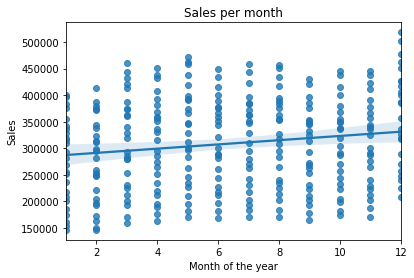

In [4]:
# figure size
plt.rc('figure', figsize=(6, 4))

# Linear regression plot
sns.regplot(x="ds_month", y='y', data=df)

# Axis labels
plt.ylabel('Sales')
plt.xlabel('Month of the year')
plt.title('Sales per month')

In the former plot we see that the linear trend does not capture the non-monotonicity.

## Plot sales per weekday

Text(0.5, 1.0, 'Sales per day')

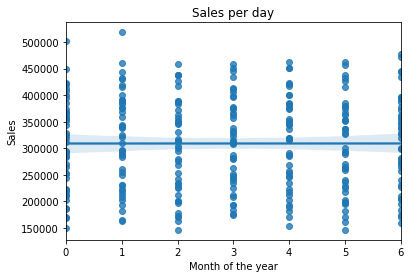

In [5]:
# figure size
plt.rc('figure', figsize=(6, 4))

# Linear regression plot
sns.regplot(x="ds_day_of_week", y='y', data=df)

# Axis labels
plt.ylabel('Sales')
plt.xlabel('Month of the year')
plt.title('Sales per day')

## Periodic feature transformation

A priori, we do not know which transformation works best, so we use both trigonometric functions, sine and cosine.

### Month

In [6]:
# The period

df["ds_month"].max()

12

In [7]:
# We transform the features with the period.

df["month_sin"] = np.sin(df["ds_month"] / df["ds_month"].max() * 2 * np.pi)

df["month_cos"] = np.cos(df["ds_month"] / df["ds_month"].max() * 2 * np.pi)

df.head()

,y,ds_month,ds_day_of_week,month_sin,month_cos
ds,,,,,
1992-01-01,146376,1,2,0.500000,8.660254e-01
1992-02-01,147079,2,5,0.866025,5.000000e-01
1992-03-01,159336,3,6,1.000000,6.123234e-17
1992-04-01,163669,4,2,0.866025,-5.000000e-01
1992-05-01,170068,5,4,0.500000,-8.660254e-01


Text(0.5, 1.0, 'Sine transformation')

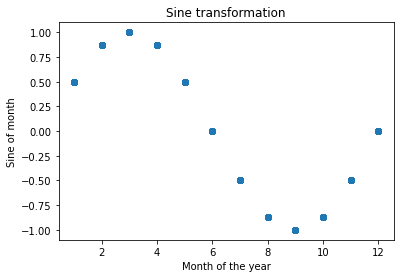

In [8]:
# plot original data vs its trigonometric transformation
plt.scatter(df["ds_month"], df["month_sin"])

# Axis labels
plt.ylabel('Sine of month')
plt.xlabel('Month of the year')
plt.title('Sine transformation')

Text(0.5, 1.0, 'Cosine transformation')

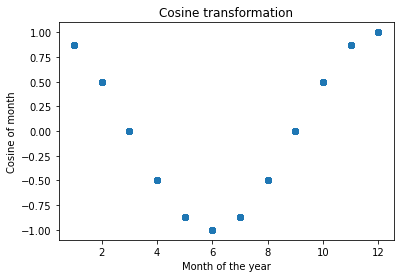

In [9]:
# plot original data vs its trigonometric transformation
plt.scatter(df["ds_month"], df["month_cos"])

# Axis labels
plt.ylabel('Cosine of month')
plt.xlabel('Month of the year')
plt.title('Cosine transformation')

### Day

In [10]:
# The period

df["ds_day_of_week"].max()

6

In [11]:
# We transform the features with the period.

df["day_sin"] = np.sin(df["ds_day_of_week"] /
                       df["ds_day_of_week"].max() * 2 * np.pi)

df["day_cos"] = np.cos(df["ds_day_of_week"] /
                       df["ds_day_of_week"].max() * 2 * np.pi)

df.head()

,y,ds_month,ds_day_of_week,month_sin,month_cos,day_sin,day_cos
ds,,,,,,,
1992-01-01,146376,1,2,0.500000,8.660254e-01,8.660254e-01,-0.5
1992-02-01,147079,2,5,0.866025,5.000000e-01,-8.660254e-01,0.5
1992-03-01,159336,3,6,1.000000,6.123234e-17,-2.449294e-16,1.0
1992-04-01,163669,4,2,0.866025,-5.000000e-01,8.660254e-01,-0.5
1992-05-01,170068,5,4,0.500000,-8.660254e-01,-8.660254e-01,-0.5


Text(0.5, 1.0, 'Sine transformation')

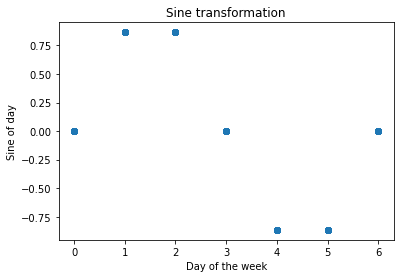

In [12]:
# plot original data vs its trigonometric transformation

plt.scatter(df["ds_day_of_week"], df["day_sin"])

# Axis labels
plt.ylabel('Sine of day')
plt.xlabel('Day of the week')
plt.title('Sine transformation')

Text(0.5, 1.0, 'Cosine transformation')

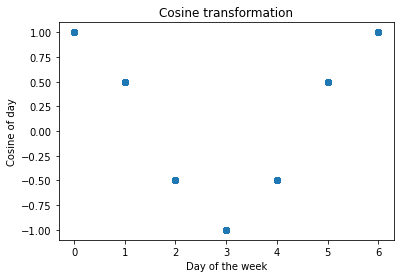

In [13]:
# plot original data vs its trigonometric transformation
plt.scatter(df["ds_day_of_week"], df["day_cos"])

# Axis labels
plt.ylabel('Cosine of day')
plt.xlabel('Day of the week')
plt.title('Cosine transformation')

## Plot sales vs trigonometric transformation

### Month

Text(0.5, 1.0, 'Sine transformation')

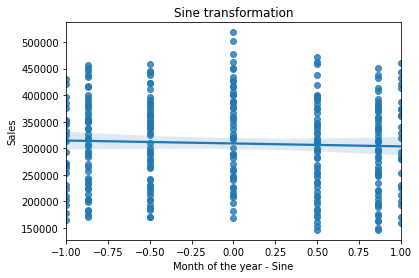

In [14]:
# figure size
plt.rc('figure', figsize=(6, 4))

# Linear regression plot
sns.regplot(x="month_sin", y='y', data=df)

# Axis labels
plt.ylabel('Sales')
plt.xlabel('Month of the year - Sine')
plt.title('Sine transformation')

Text(0.5, 1.0, 'Cosine transformation')

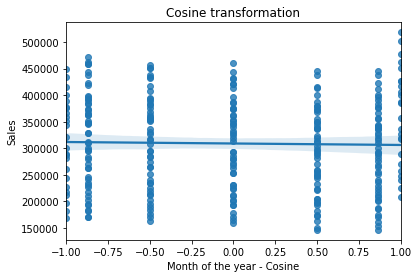

In [15]:
# figure size
plt.rc('figure', figsize=(6, 4))

# Linear regression plot
sns.regplot(x="month_cos", y='y', data=df)

# Axis labels
plt.ylabel('Sales')
plt.xlabel('Month of the year - Cosine')
plt.title('Cosine transformation')

## Day

Text(0.5, 1.0, 'Sine transformation')

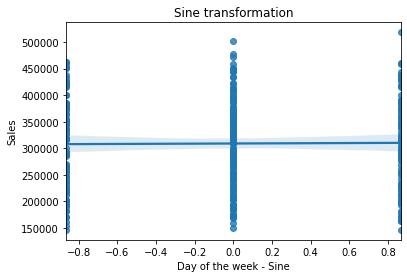

In [16]:
# figure size
plt.rc('figure', figsize=(6, 4))

# Linear regression plot
sns.regplot(x="day_sin", y='y', data=df)

# Axis labels
plt.ylabel('Sales')
plt.xlabel('Day of the week - Sine')
plt.title('Sine transformation')

Text(0.5, 1.0, 'Cosine transformation')

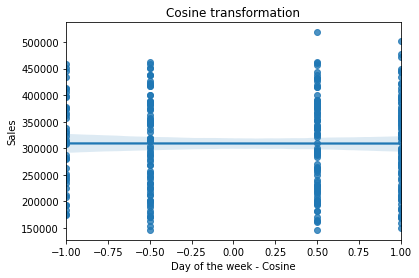

In [17]:
# figure size
plt.rc('figure', figsize=(6, 4))

# Linear regression plot
sns.regplot(x="day_cos", y='y', data=df)

# Axis labels
plt.ylabel('Sales')
plt.xlabel('Day of the week - Cosine')
plt.title('Cosine transformation')

#  Pollutants

We work now with the air quality dataset that we created in the notebook **03-prepare-air-quality-dataset** which you can find in the folder **01-Create-Datasets** in this repository.

In [18]:
# Function to load and prepare input data.

def load_data():

    # Data lives here.
    filename = '../datasets/AirQualityUCI_ready.csv'

    # Load data: only the time variable and CO
    data = pd.read_csv(filename, usecols=['Date_Time', 'CO_sensor'])

    # Cast date variable in datetime format.
    data['Date_Time'] = pd.to_datetime(data['Date_Time'])

    # Set the index to the timestamp.
    data.index = data['Date_Time']

    # Sanity: sort index.
    data.sort_index(inplace=True)

    # Reduce data span.
    data = data[(
        data['Date_Time'] >= '2004-04-01') &
        (data['Date_Time'] <= '2005-04-30')
    ]

    # Remove outliers
    data = data.loc[(data['CO_sensor'] > 0)]

    return data

In [19]:
# Load data.

data = load_data()

data.head()

,Date_Time,CO_sensor
Date_Time,,
2004-04-04 00:00:00,2004-04-04 00:00:00,1224.0
2004-04-04 01:00:00,2004-04-04 01:00:00,1215.0
2004-04-04 02:00:00,2004-04-04 02:00:00,1115.0
2004-04-04 03:00:00,2004-04-04 03:00:00,1124.0
2004-04-04 04:00:00,2004-04-04 04:00:00,1028.0


## Add temporal features

We will extract month and hour from the index.

In [20]:
# Extract month and hour from timestamp

dtf = DatetimeFeatures(
    variables='Date_Time',  # the timestamp
    features_to_extract=["month", "hour"],  # the features to create
    drop_original=True  # if we want to drop the timestamp.
)

# Extract the datetime features
data = dtf.fit_transform(data)

# Show new variables
data.head()

,CO_sensor,Date_Time_month,Date_Time_hour
Date_Time,,,
2004-04-04 00:00:00,1224.0,4,0
2004-04-04 01:00:00,1215.0,4,1
2004-04-04 02:00:00,1115.0,4,2
2004-04-04 03:00:00,1124.0,4,3
2004-04-04 04:00:00,1028.0,4,4


## Hourly pollutant concentration

Text(0.5, 1.0, 'Hourly pollutant concentration')

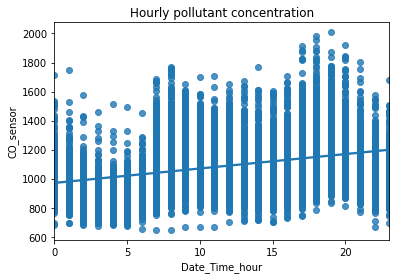

In [21]:
# pollutant concentration per hr.

sns.regplot(x="Date_Time_hour", y='CO_sensor', data=data)
plt.title('Hourly pollutant concentration')

## Periodic transformation

Text(0.5, 1.0, 'Hourly pollutant concentration - Sine')

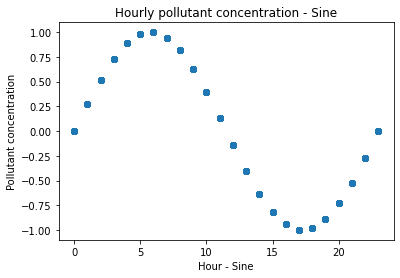

In [22]:
data["hour_sin"] = np.sin(data["Date_Time_hour"] /
                          data["Date_Time_hour"].max() * 2 * np.pi)

plt.scatter(data["Date_Time_hour"], data['hour_sin'])

# Axis labels
plt.ylabel('Pollutant concentration')
plt.xlabel('Hour - Sine')
plt.title('Hourly pollutant concentration - Sine')

Text(0.5, 1.0, 'Hourly pollutant concentration - Cosine')

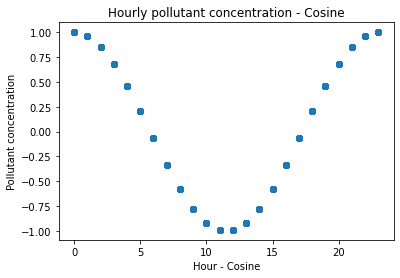

In [23]:
data["hour_cos"] = np.cos(data["Date_Time_hour"] /
                          data["Date_Time_hour"].max() * 2 * np.pi)

plt.scatter(data["Date_Time_hour"], data['hour_cos'])

plt.ylabel('Pollutant concentration')
plt.xlabel('Hour - Cosine')
plt.title('Hourly pollutant concentration - Cosine')

## Pollutant in time

We plot the hourly pollutant concentration based of the transformed features.

Text(0.5, 1.0, 'Hourly pollutant concentration - Sine')

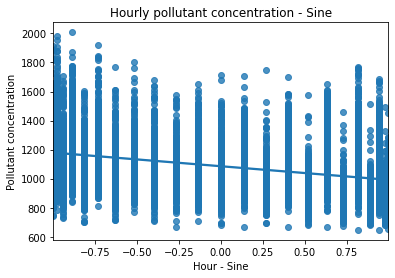

In [24]:
sns.regplot(x="hour_sin", y='CO_sensor', data=data)
plt.ylabel('Pollutant concentration')
plt.xlabel('Hour - Sine')
plt.title('Hourly pollutant concentration - Sine')

Text(0.5, 1.0, 'Hourly pollutant concentration - Cosine')

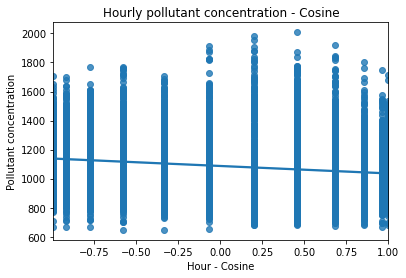

In [25]:
sns.regplot(x="hour_cos", y='CO_sensor', data=data)

plt.ylabel('Pollutant concentration')
plt.xlabel('Hour - Cosine')
plt.title('Hourly pollutant concentration - Cosine')

## Automate with Feature-engine

[CyclicalTransformer](https://feature-engine.readthedocs.io/en/latest/api_doc/creation/CyclicalTransformer.html)

### Retail data

In [26]:
# Load data

df = pd.read_csv('../Datasets/example_retail_sales.csv',
                 parse_dates=['ds'],
                 )

df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


In [27]:
# Get datetime features from timestamp
# and make periodic transformation.

pipe = Pipeline([
    ('datetime', DatetimeFeatures(
        features_to_extract=["month", "day_of_week"],
        drop_original=True,
    )),

    ('cyclical', CyclicalTransformer(
        variables=['ds_month', 'ds_day_of_week'],
    )),
])

In [28]:
df = pipe.fit_transform(df)

df.head()

,y,ds_month,ds_day_of_week,ds_month_sin,ds_month_cos,ds_day_of_week_sin,ds_day_of_week_cos
0,146376,1,2,0.500000,8.660254e-01,8.660254e-01,-0.5
1,147079,2,5,0.866025,5.000000e-01,-8.660254e-01,0.5
2,159336,3,6,1.000000,6.123234e-17,-2.449294e-16,1.0
3,163669,4,2,0.866025,-5.000000e-01,8.660254e-01,-0.5
4,170068,5,4,0.500000,-8.660254e-01,-8.660254e-01,-0.5


That is all for this notebook.

More details on working with temporal features in the [Scikit-learn docs](https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html#trigonometric-features)